In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<AxesSubplot:xlabel='count', ylabel='area_type'>

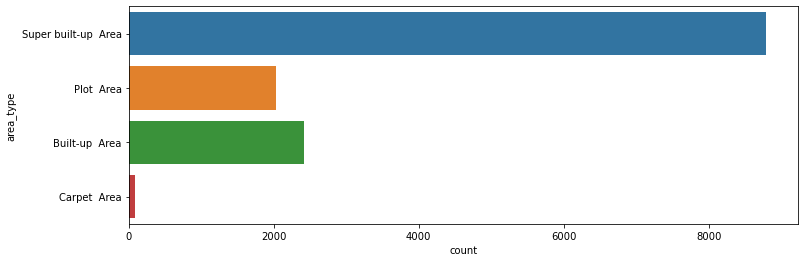

In [5]:
plt.figure(figsize=(12,4))
df.groupby('area_type')['area_type'].count()  #agg('count')
sns.countplot(y=df['area_type'])

<AxesSubplot:xlabel='area_type', ylabel='price'>

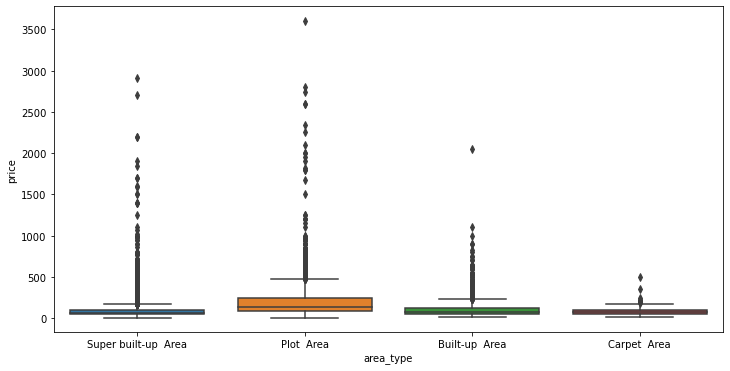

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(x='area_type',y="price",data=df)

In [7]:
df.society.unique(),df.society.nunique()

(array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
       dtype=object),
 2688)

In [8]:
df.location.unique(),df.location.nunique()

(array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
        '12th cross srinivas nagar banshankari 3rd stage',
        'Havanur extension', 'Abshot Layout'], dtype=object),
 1305)

In [9]:
df1=df.drop(["society","area_type","balcony","availability"],axis=1)
df1.sample(4)

,location,size,total_sqft,bath,price
8262,Kannamangala,3 BHK,1536,3.0,104.0
3735,EPIP Zone,3 BHK,1500,3.0,102.0
7677,Ramamurthy Nagar,3 BHK,1305,3.0,60.0
1870,Yelachenahalli,4 Bedroom,1800,3.0,220.0


In [10]:
df1.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [11]:
cols=df1.columns.to_list()
cols[cols.index("size")]="bhk"
df1.columns=cols
df1.columns

Index(['location', 'bhk', 'total_sqft', 'bath', 'price'], dtype='object')

In [12]:
df1.isnull().sum()

location       1
bhk           16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df1.dropna(subset=['location','bhk'],inplace=True)

In [14]:
df1['bhk'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df1['bhk']=df1['bhk'].apply(lambda x: int(x.split(" ")[0]))

In [16]:
df1.bath.fillna(0,inplace=True)

In [17]:
df1.isnull().sum()

location      0
bhk           0
total_sqft    0
bath          0
price         0
dtype: int64

In [18]:
df2=df1.copy()

In [19]:
def is_float(x):
    try:
        np.uint16(x)
    except:
        return True
    return False

df2.loc[df2['total_sqft'].apply(is_float)].total_sqft.unique()

array(['2100 - 2850', '1330.74', '3010 - 3410', '2957 - 3450',
       '3067 - 8156', '1042 - 1105', '1563.05', '1145 - 1340',
       '1015 - 1540', '1520 - 1740', '2023.71', '1113.27',
       '34.46Sq. Meter', '1752.12', '1195 - 1440', '4125Perch',
       '1120 - 1145', '4400 - 6640', '3090 - 5002', '4400 - 6800',
       '1160 - 1195', '1000Sq. Meter', '4000 - 5249', '1115 - 1130',
       '1100Sq. Yards', '520 - 645', '1000 - 1285', '3606 - 5091',
       '650 - 665', '633 - 666', '2112.95', '5.31Acres', '30Acres',
       '1445 - 1455', '884 - 1116', '850 - 1093', '1440 - 1884',
       '1558.67', '3467.86', '716Sq. Meter', '547.34 - 827.31', '804.1',
       '580 - 650', '3425 - 3435', '1269.72', '1804 - 2273',
       '3630 - 3800', '660 - 670', '1500Sq. Meter', '620 - 933',
       '142.61Sq. Meter', '2695 - 2940', '1574Sq. Yards', '3450 - 3472',
       '2479.13', '2172.65', '581.91', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '361.33Sq. Yards', '645 - 936',
 

In [20]:
def con_float(x):
    try:
        return float(x)
    except ValueError:
        z=x.split("-")
        if len(z)==2:
            return (float(z[0])+float(z[1]))/2
        return None

In [21]:
df2['total_sqft']=df1['total_sqft'].apply(con_float)

In [22]:
df2.isnull().sum()

location       0
bhk            0
total_sqft    46
bath           0
price          0
dtype: int64

In [23]:
df2.dropna(inplace=True)

In [24]:
df2[df2['total_sqft'].apply(is_float)]

,location,bhk,total_sqft,bath,price


In [25]:
df2.dtypes

location       object
bhk             int64
total_sqft    float64
bath          float64
price         float64
dtype: object

In [26]:
df2.location.nunique()

1298

In [27]:
df2.location=df2.location.apply(lambda x: x.strip())
loc_counts=df2.location.value_counts()
len(loc_counts[loc_counts<=10])

1047

In [28]:
loc_names=loc_counts[loc_counts>10].index

In [29]:
df2.location=df2.location.apply(lambda x: x if x in loc_names else "other")
df2.location.nunique()

241

In [30]:
df3=df2.copy()

In [31]:
df3['price_per_sqft']=round((df3.price*100000)/df3.total_sqft,2)
df3.sample(5)

,location,bhk,total_sqft,bath,price,price_per_sqft
5858,Shampura,6,1150.0,6.0,75.00,6521.74
2626,Raja Rajeshwari Nagar,2,1306.0,2.0,55.91,4281.01
4359,other,6,1790.0,5.0,250.00,13966.48
12640,Horamavu Agara,3,1300.0,2.0,52.00,4000.00
11187,Bannerghatta,4,940.0,4.0,45.00,4787.23


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

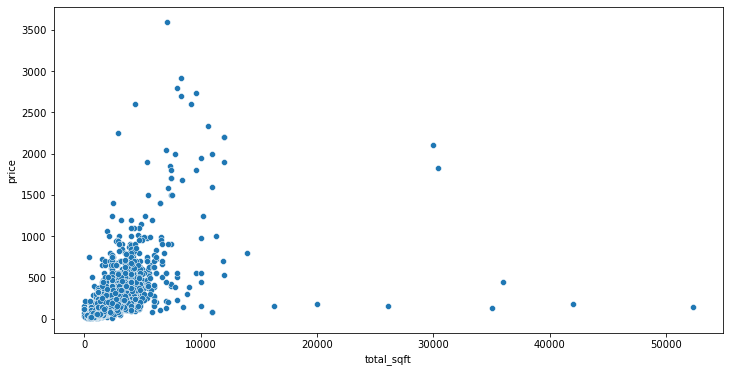

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="total_sqft",y="price",data=df3)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

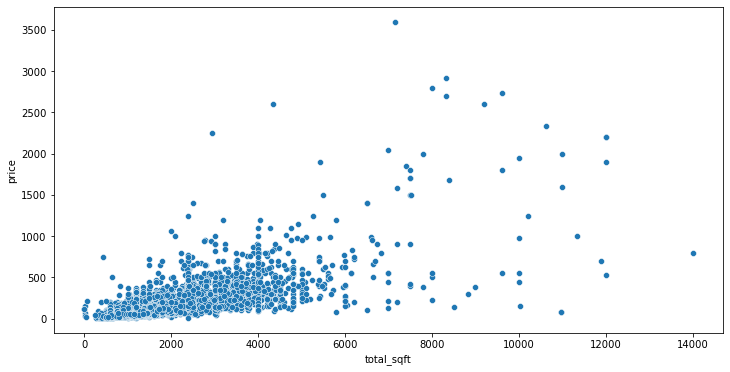

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df3[df3.total_sqft<15000]["total_sqft"],y=df3["price"])

<AxesSubplot:xlabel='total_sqft', ylabel='Count'>

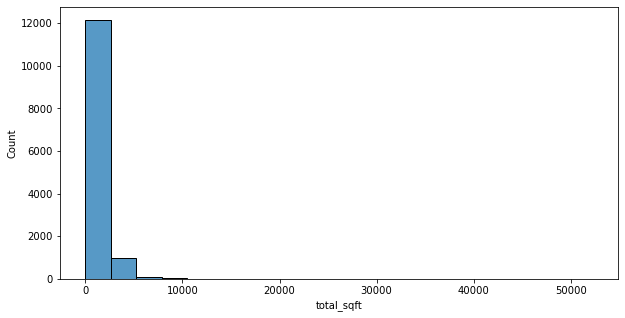

In [70]:
plt.figure(figsize=(10,5))
sns.histplot(df3.total_sqft,bins=20)

<AxesSubplot:xlabel='total_sqft', ylabel='Count'>

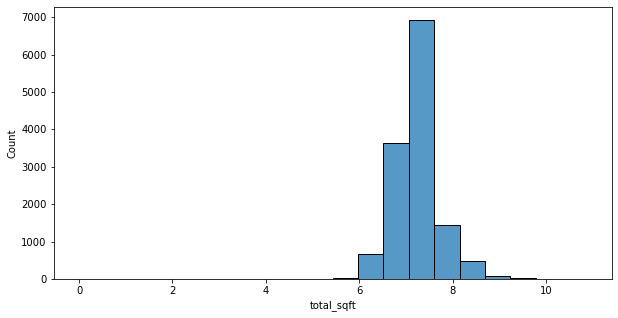

In [71]:
plt.figure(figsize=(10,5))
sns.histplot(np.log(df3.total_sqft),bins=20)

<AxesSubplot:xlabel='total_sqft'>

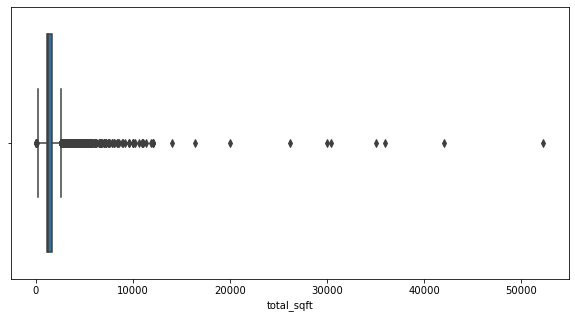

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df3.total_sqft)

In [36]:
df3[df3.total_sqft<500]

,location,bhk,total_sqft,bath,price,price_per_sqft
78,Kaval Byrasandra,2,460.0,1.0,22.0,4782.61
119,Hennur Road,2,276.0,3.0,23.0,8333.33
171,Attibele,1,450.0,1.0,11.0,2444.44
177,Nagavara,1,400.0,1.0,14.0,3500.00
349,other,3,11.0,3.0,74.0,672727.27
...,...,...,...,...,...,...
12579,Chandapura,1,410.0,1.0,10.0,2439.02
12666,Marsur,2,497.0,1.0,20.0,4024.14
12895,other,1,450.0,1.0,20.0,4444.44
13112,Nagavara,3,440.0,3.0,35.0,7954.55


In [68]:
df4=df3.drop(df3[df3.total_sqft<500].index)
df4=df4.drop(df4[df4.total_sqft>15000].index)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

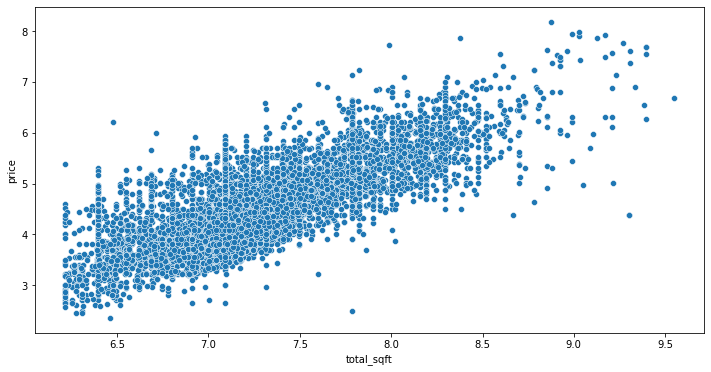

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=np.log(df4.total_sqft),y=np.log(df4.price))

<AxesSubplot:xlabel='price', ylabel='Count'>

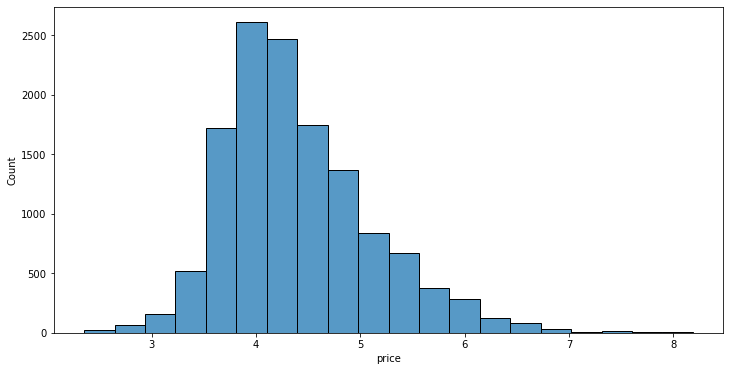

In [94]:
plt.figure(figsize=(12,6))
sns.histplot(np.log(df4.price),bins=20)

In [95]:
df4[df4.bath>10]

,location,bhk,total_sqft,bath,price,price_per_sqft
938,5th Phase JP Nagar,9,1260.0,11.0,290.0,23015.87
1078,other,9,3300.0,14.0,500.0,15151.52
1718,other,27,8000.0,27.0,230.0,2875.00
1768,other,11,1200.0,11.0,170.0,14166.67
1953,KR Puram,8,1200.0,12.0,110.0,9166.67
1979,other,8,990.0,12.0,120.0,12121.21
3096,other,10,12000.0,12.0,525.0,4375.00
3379,other,19,2000.0,16.0,490.0,24500.00
3609,other,16,10000.0,16.0,550.0,5500.00
4684,Munnekollal,43,2400.0,40.0,660.0,27500.00


In [103]:
d=df4[df4.total_sqft/df4.bhk <300]
d.sample(5)

,location,bhk,total_sqft,bath,price,price_per_sqft
13198,other,8,1200.0,8.0,140.0,11666.67
2391,other,4,800.0,4.0,120.0,15000.00
3418,Kumaraswami Layout,5,1270.0,4.0,128.0,10078.74
4011,Hoodi,8,1120.0,8.0,150.0,13392.86
4912,other,9,750.0,6.0,112.0,14933.33


In [104]:
df5=df4.drop(d.index)

In [109]:
df5[np.abs(df5.bath-df5.bhk)>2].sample(4)

,location,bhk,total_sqft,bath,price,price_per_sqft
5464,KR Puram,3,1462.5,0.0,62.81,4294.70
12443,other,4,4350.0,8.0,2600.00,59770.11
7709,Chikkabanavar,4,2460.0,7.0,80.00,3252.03
4340,Dasarahalli,7,2400.0,3.0,150.00,6250.00


In [120]:
df5.loc[df5[df5.bath==0].index,"bath"]=df5.bhk
df5[df5.bath==0]

,location,bhk,total_sqft,bath,price,price_per_sqft


In [131]:
d=df5[np.abs(df5.bath-df5.bhk)>2]
d

,location,bhk,total_sqft,bath,price,price_per_sqft
1078,other,9,3300.0,14.0,500.0,15151.52
2620,other,6,11338.0,9.0,1000.0,8819.90
2649,Malleshwaram,7,3000.0,4.0,900.0,30000.00
3000,Frazer Town,5,2350.0,2.0,423.0,18000.00
4340,Dasarahalli,7,2400.0,3.0,150.0,6250.00
5884,other,6,1800.0,3.0,105.0,5833.33
6048,JP Nagar,7,2700.0,4.0,160.0,5925.93
6838,Rajaji Nagar,5,7500.0,8.0,1700.0,22666.67
6862,other,8,3150.0,5.0,145.0,4603.17
7596,other,8,3000.0,4.0,130.0,4333.33


In [132]:
df5=df5.drop(d.index)

In [135]:
df5.bhk.value_counts()

2     5477
3     4747
4     1256
1      558
5      201
6       87
7       37
8       22
9       14
10       5
11       2
16       1
13       1
Name: bhk, dtype: int64

In [136]:
df5[df5.bhk>9]

,location,bhk,total_sqft,bath,price,price_per_sqft
459,other,11,5000.0,9.0,360.0,7200.00
3096,other,10,12000.0,12.0,525.0,4375.00
3609,other,16,10000.0,16.0,550.0,5500.00
7979,other,11,6000.0,12.0,150.0,2500.00
8636,Neeladri Nagar,10,4000.0,12.0,160.0,4000.00
9769,other,10,3300.0,9.0,450.0,13636.36
9935,other,13,5425.0,13.0,275.0,5069.12
11142,Munnekollal,10,7200.0,10.0,200.0,2777.78
11327,Kogilu,10,3280.0,9.0,450.0,13719.51


In [139]:
df5[df5.location=='Rajaji Nagar'].bhk.unique()

array([4, 3, 7, 2, 6, 5, 1], dtype=int64)

In [153]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar', 'Gottigere',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'other', 'Kengeri', 'Binny Pete',
       'Thanisandra', 'Bellandur', 'Electronic City', 'Ramagondanahalli',
       'Yelahanka', 'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'Doddathoguru', 'KR Puram',
       'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road', 'Devanahalli',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Kothannur', 'Kalena Agrahara', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - Attibele Road',
       'Yeshwanthpur', 'Chandapura'

In [161]:
colors=['red','green','blue','yellow','#00ffff','#ff00bf','black','#937f91','#ff4000','#937f3c']

def plot_loc_bhk(df,location):
    df=df[df.location==location][['bhk','total_sqft','price']]
    matplotlib.rcParams['figure.figsize']=(15,10)
    for i,bhk in enumerate(df.bhk.unique()):
        bhk_df=df[df.bhk==bhk]
        plt.scatter(bhk_df.total_sqft,bhk_df.price,color=colors[i],label=f'{bhk} BHK',s=50)
    plt.xlabel('total sqft')
    plt.ylabel('total price')
    plt.title(location)
    plt.legend()

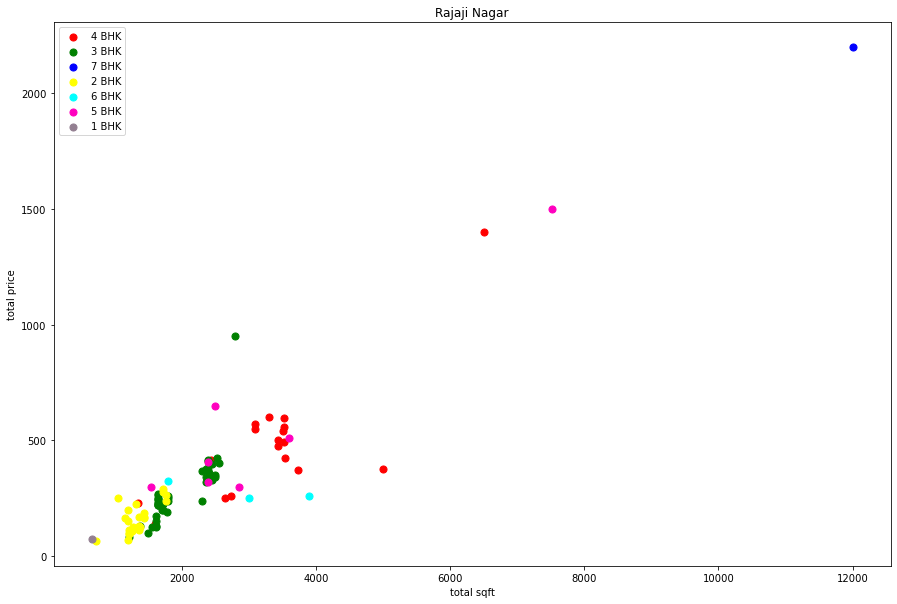

In [157]:
plot_loc_bhk(df5,'Rajaji Nagar')

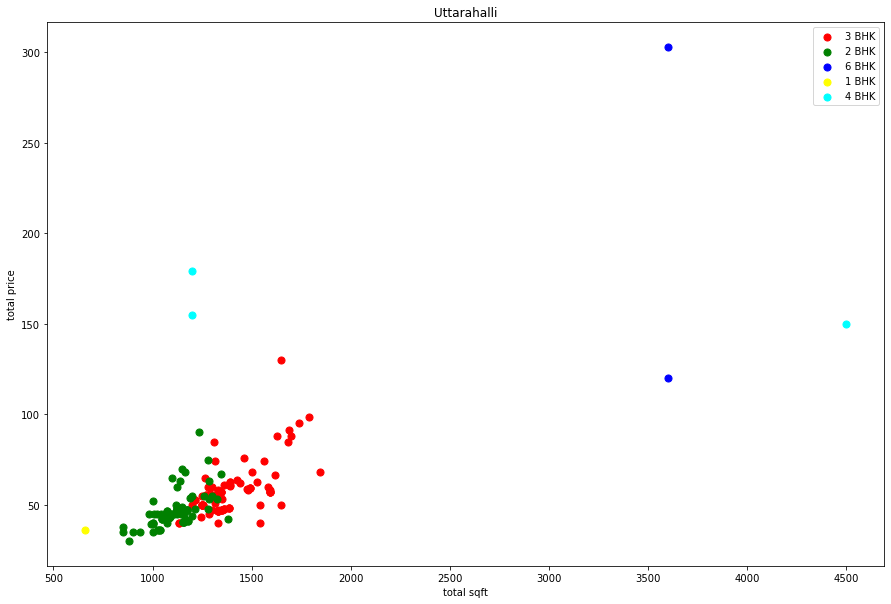

In [159]:
plot_loc_bhk(df5,'Uttarahalli')

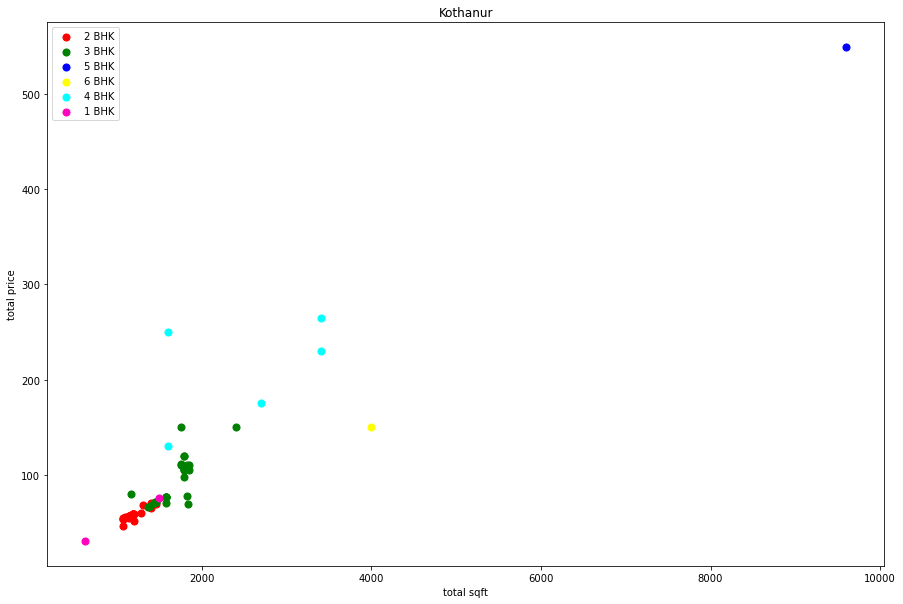

In [162]:
plot_loc_bhk(df5,'Kothanur')

In [194]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df['price_per_sqft']<stats['mean']].index.values)
    return df.drop(exclude_indices,axis='index')

df6=remove_bhk_outliers(df5)
df6.shape ,df5.shape            

((8696, 6), (12408, 6))

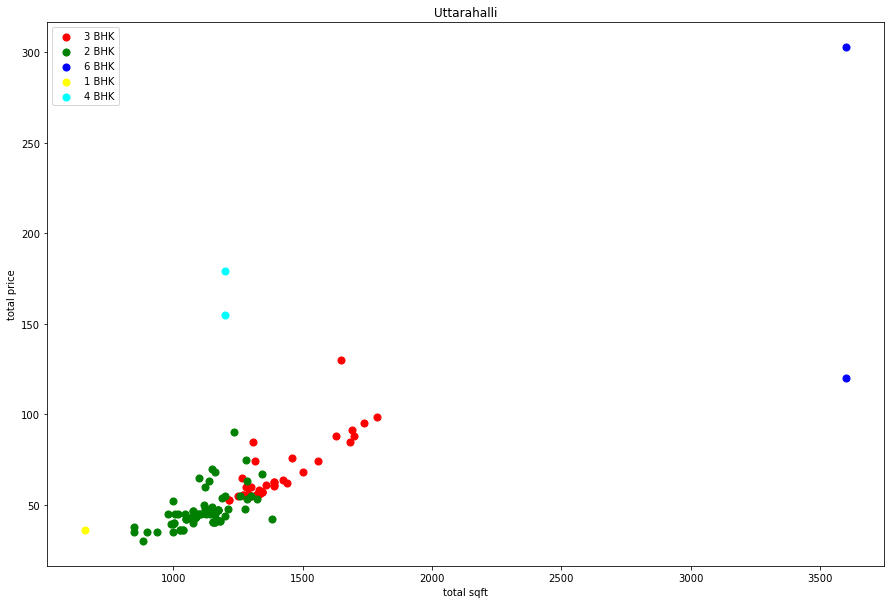

In [168]:
plot_loc_bhk(df6,'Uttarahalli')

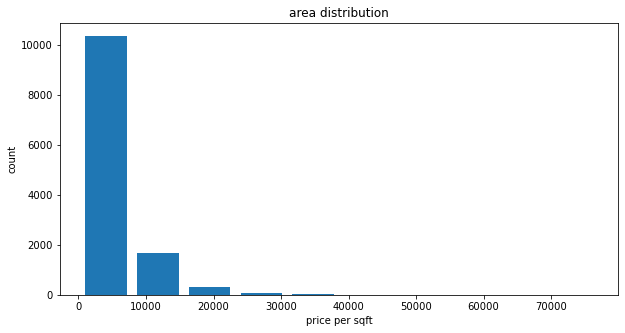

In [171]:
matplotlib.rcParams["figure.figsize"]=(10,5)
plt.hist(df5['price_per_sqft'],rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel('count')
plt.title('area distribution')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

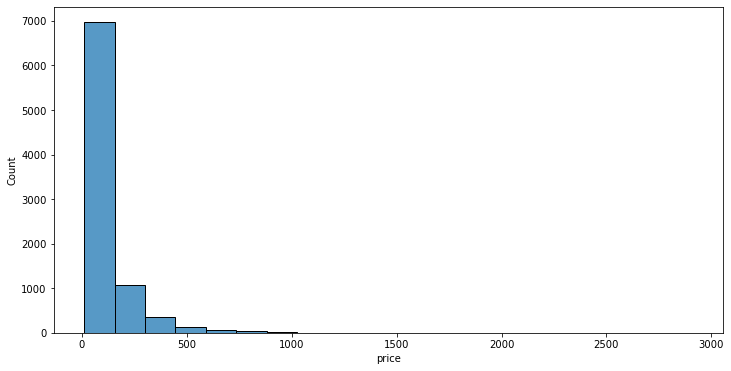

In [177]:
plt.figure(figsize=(12,6))
sns.histplot(df6.price,bins=20)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

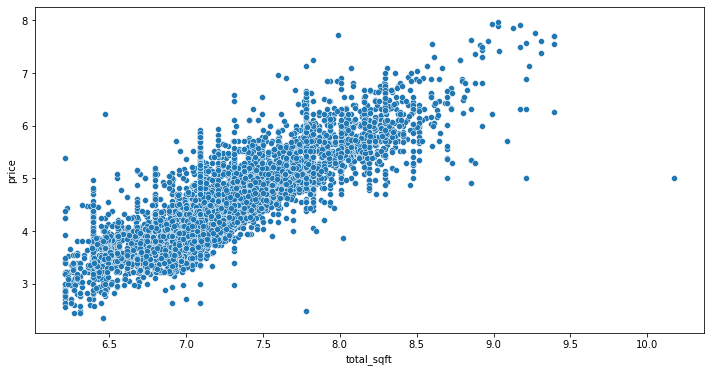

In [183]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=np.log(df6.total_sqft),y=np.log(df6.price))

In [198]:
upper_limit=np.exp(9.5)
df6=df6.drop(df6[df6.total_sqft>upper_limit].index)

<AxesSubplot:xlabel='bhk', ylabel='price'>

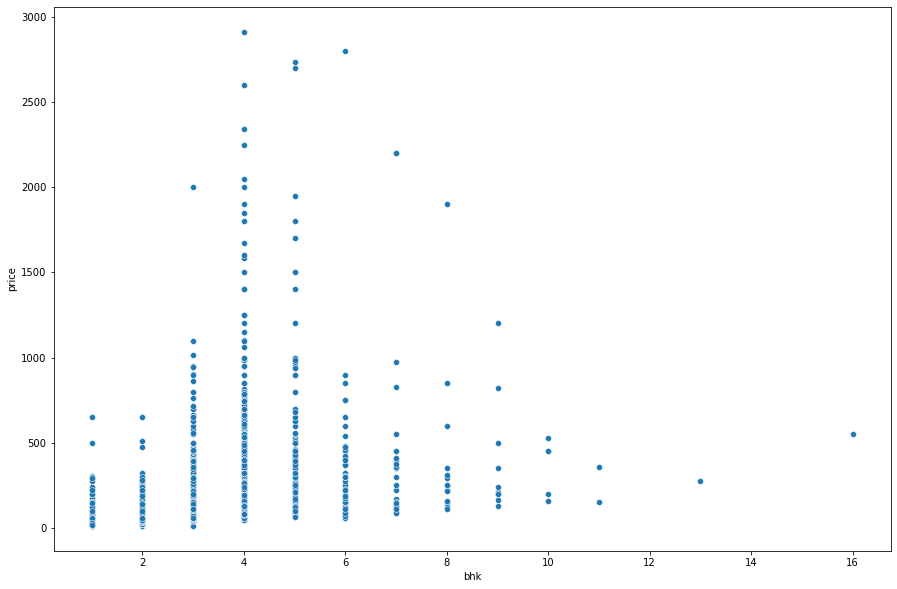

In [200]:
sns.scatterplot(x=df6.bhk,y=df6.price)

<AxesSubplot:xlabel='bhk', ylabel='total_sqft'>

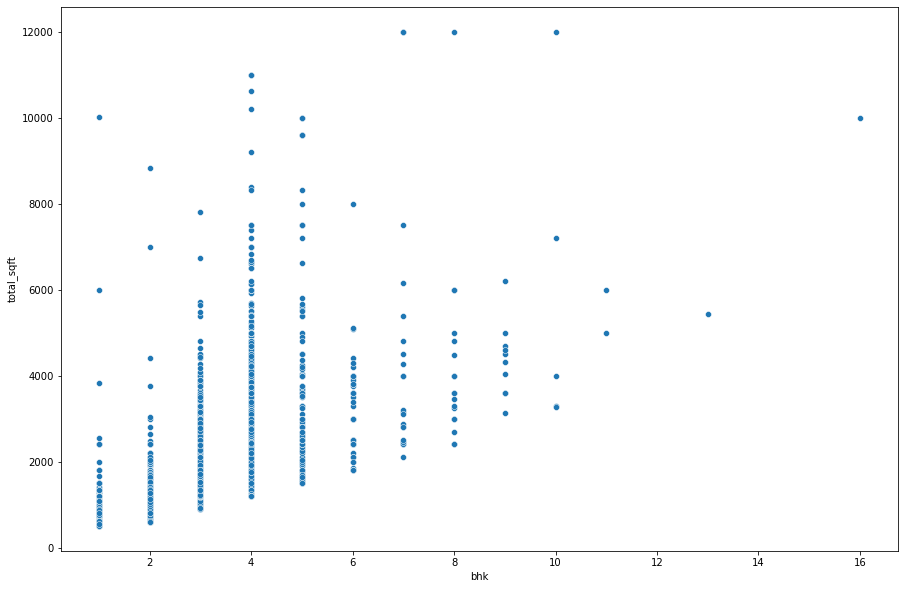

In [202]:
sns.scatterplot(x=df6.bhk,y=df6.total_sqft)

In [201]:
df6[df6.bhk>10]

,location,bhk,total_sqft,bath,price,price_per_sqft
459,other,11,5000.0,9.0,360.0,7200.00
3609,other,16,10000.0,16.0,550.0,5500.00
7979,other,11,6000.0,12.0,150.0,2500.00
9935,other,13,5425.0,13.0,275.0,5069.12


In [203]:
df6=df6.drop(df6[df6.bhk>10].index)

In [204]:
df6.dtypes

location           object
bhk                 int64
total_sqft        float64
bath              float64
price             float64
price_per_sqft    float64
dtype: object

In [208]:
df6.corr()

,bhk,total_sqft,bath,price,price_per_sqft
bhk,1.000000,0.678151,0.888037,0.524883,0.407697
total_sqft,0.678151,1.000000,0.709506,0.790831,0.378681
bath,0.888037,0.709506,1.000000,0.551097,0.405958
price,0.524883,0.790831,0.551097,1.000000,0.734491
price_per_sqft,0.407697,0.378681,0.405958,0.734491,1.000000


In [209]:
df7=df6.drop('price_per_sqft',axis=1)

In [210]:
df7.price=np.log(df6.price)
df7.total_sqft=np.log(df6.total_sqft)
df7.sample(5)

,location,bhk,total_sqft,bath,price
10455,Hennur Road,3,7.591357,3.0,4.897840
1060,Yelahanka,2,7.118016,2.0,4.382027
3146,Murugeshpalya,3,7.346010,3.0,4.304065
13166,Doddathoguru,2,6.810142,2.0,3.688879
9319,Kaggadasapura,2,6.652863,2.0,3.384390


In [211]:
df7.corr()

,bhk,total_sqft,bath,price
bhk,1.000000,0.763298,0.888037,0.708997
total_sqft,0.763298,1.000000,0.771411,0.847009
bath,0.888037,0.771411,1.000000,0.715238
price,0.708997,0.847009,0.715238,1.000000


In [372]:
from sklearn.preprocessing import StandardScaler
input_scaler=StandardScaler()
input_scaled_df=pd.DataFrame(input_scaler.fit_transform(df7[['bhk','total_sqft','bath']]),
                       columns=['bhk','total_sqft','bath'],index=df7.index)
input_scaled_df.head()

,bhk,total_sqft,bath
0,-0.613505,-0.667607,-0.521366
2,0.412071,0.036420,-0.521366
3,0.412071,0.160642,0.396994
4,-0.613505,-0.377435,-0.521366
6,1.437647,1.490057,1.315354


In [383]:
price_scaler=StandardScaler()
price_scaled=price_scaler.fit_transform(df7.price.values.reshape(-1,1))
price_scaled

array([[-1.07708408],
       [-0.46900165],
       [ 0.09294324],
       ...,
       [-0.51218009],
       [ 2.24784522],
       [-2.1728683 ]])

In [385]:
dummy_df=pd.get_dummies(df7.location,drop_first=True)
X=pd.concat([input_scaled_df,dummy_df],axis=1)
X.sample(5)

,bhk,total_sqft,bath,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
5413,-0.613505,-0.523933,-0.521366,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4127,-0.613505,-0.396431,-0.521366,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3926,1.437647,2.777841,1.315354,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
981,0.412071,-0.034020,-0.521366,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5283,-0.613505,-0.691376,-0.521366,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
X=final_df.drop('price',axis='columns')

In [384]:
y=price_scaled

In [444]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.8340020856325698

In [238]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [239]:
models=[Lasso(),Ridge(),LinearRegression(),RandomForestRegressor() \
         ,DecisionTreeRegressor(),SVR(C=1.3),KNeighborsRegressor(n_neighbors=7),GradientBoostingRegressor()]

score=[]
for model in models:
    score.append(cross_val_score(model,X,y,n_jobs=-1,cv=cv).mean())
pd.DataFrame(score,index=models).sort_values(by=0,ascending=False)

,0
SVR(C=10),0.853127
RandomForestRegressor(),0.833084
KNeighborsRegressor(),0.831719
LinearRegression(),0.831371
Ridge(),0.831091
GradientBoostingRegressor(),0.824312
DecisionTreeRegressor(),0.770690
Lasso(),-0.000935


In [296]:
df7.location.unique()

array(['Electronic City Phase II', 'Uttarahalli', 'Lingadheeranahalli',
       'Kothanur', 'Old Airport Road', 'Rajaji Nagar', 'Whitefield',
       '7th Phase JP Nagar', 'Gottigere', 'Sarjapur', 'Mysore Road',
       'Bisuvanahalli', 'other', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Ramagondanahalli', 'Electronic City', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road', 'Kundalahalli',
       'Murugeshpalya', 'Doddathoguru', 'KR Puram',
       'Lakshminarayana Pura', 'Begur Road', 'Devanahalli', 'Varthur',
       'Bommanahalli', 'Gunjur', 'Marathahalli', 'Hegde Nagar',
       'Haralur Road', 'Hennur Road', 'Kothannur', 'Kalena Agrahara',
       'ISRO Layout', 'Garudachar Palya', 'EPIP Zone', 'Dasanapura',
       'Kasavanhalli', 'Sanjay nagar', 'Domlur',
       'Sarjapura - Attibele Road', 'Ramamurthy Nagar', 'Sarjapur  Road',
       'Malleshwaram', 'Akshaya Nagar', 'Shampura', 'Kadugodi', 'Hormavu',
       'Kudlu Gate', '8th Phase JP Nagar', 'Bommasand

In [305]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
model=SVR(C=1.3)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8568108799782952

In [463]:
def predict_home_price(bhk,total_sqft,bath,location):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0],x[1],x[2]= input_scaler.transform([[bhk,np.log(total_sqft),bath]])[0]
    x[loc_index]=1
     
    return np.exp(price_scaler.inverse_transform([model.predict([x])]))[0]

In [464]:
predict_home_price(3,1934,3,'Kogilu')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([[146.58291486]])

In [465]:
import pickle

with open('model.pickle','wb') as f:
    pickle.dump(model,f)

In [466]:
import json

columns={
    'data-columns':[col.lower() for col in final_df.columns]
}

with open('colummns.json','w') as f:
    f.write(json.dumps(columns))